## **Predicting Box Office Success: Enhancing Accuracy with Keyword Analysis**

Isabel O'Connor, Katie Shaughnessy, Emmanuella Cann, Carson Colyer, 	Krishu Wadhwa

## Load Data + Basic EDA

**Research Questions** (from pre analysis plan)



*   To what extent do keywords enhance the predictive accuracy (in terms of measured RMSE) of a box office success model built on traditional variables such as genre, studio, and budget?  
  *   Do genre-specific keywords add unique predictive value to a model for box office success, or are there universal keywords that enhance predictions across multiple genres?
*   How does the relative importance of keywords in predicting box office success vary based on the studio producing the film?

**Potential Audiences**  



*   Film Studios and Production Companies
  *   Studios such as Warner Brothers, Universal, and Disney could use the insights to optimize their marketing, budgeting, and production strategies by identifying trends and keywords that drive box office success.
*   Streaming Platforms
  *   Companies like Netflix, Max, Amazon, and Hulu can benefit from understanding trends to make data-driven decisions about acquiring or producing films likely to perform well based on audience interests.
*   Academic and Research Institutions
  * Universities and research organizations focused on media studies, data science, or consumer behavior could use the findings to further explore the intersection of data analytics and film industry success, contributing to scholarly work on predictive modeling and media trends.

In [ ]:
! git clone "https://github.com/oak50/DS3001-Project1.git"

Cloning into 'DS3001-Project1'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 219 (delta 45), reused 17 (delta 12), pack-reused 154 (from 1)
Receiving objects: 100% (219/219), 12.42 MiB | 11.30 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Grouping directors based on average film revenue:

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/DS3001-Project1/Data/movie_dataset.csv')

# Group by director and calculate average revenue
average_revenue_by_director = df.groupby('director')['revenue'].mean()

# Sort directors by average revenue in descending order and select the top 20
top_20_directors = average_revenue_by_director.sort_values(ascending=False).head(20)

# Print the result
pd.set_option('display.float_format', '{:,.0f}'.format)
print(top_20_directors)

director
Chris Buck         1,274,219,009
Kyle Balda         1,156,730,962
Lee Unkrich        1,066,969,703
Joss Whedon          987,943,689
Chris Renaud         875,958,308
James Cameron        840,509,920
Roger Allers         788,241,776
Tim Miller           783,112,979
Colin Trevorrow      758,768,301
Robert Stromberg     758,539,785
Pierre Coffin        757,137,935
Dan Scanlon          743,559,607
David Yates          742,971,665
Peter Jackson        722,071,424
Pete Docter          718,508,837
Chris Miller         676,972,821
George Lucas         667,822,779
Carlos Saldanha      633,112,948
Jan Pinkava          623,722,818
Shane Black          615,612,571
Name: revenue, dtype: float64


In [ ]:
# Group by director and calculate average revenue
average_revenue_by_director = df.groupby('director')['revenue'].mean()

# Sort directors by average revenue in descending order and select ranks 20 to 40
directors_20_to_40 = average_revenue_by_director.sort_values(ascending=False).iloc[20:40]

# Print the result with full numbers and commas
pd.set_option('display.float_format', '{:,.0f}'.format)
print(directors_20_to_40)

director
Dean DeBlois          609,123,048
Jennifer Yuh Nelson   593,431,553
Byron Howard          591,794,936
Francis Lawrence      590,491,436
Richard Marquand      572,700,000
Steve Martino         561,738,948
Alan Taylor           542,587,470
Brenda Chapman        538,983,207
Christopher Nolan     528,435,404
Andrew Stanton        527,261,339
David Silverman       527,068,851
Andrew Adamson        521,371,889
Marc Webb             506,218,674
Anthony Russo         499,625,609
Michael Bay           486,043,720
Chris Williams        481,042,718
John Lasseter         473,189,112
Rich Moore            471,222,889
Gore Verbinski        453,859,051
Conrad Vernon         423,061,254
Name: revenue, dtype: float64


In [ ]:
# Group by director and calculate average revenue
average_revenue_by_director = df.groupby('director')['revenue'].mean()

# Sort directors by average revenue in descending order and select ranks 20 to 40
directors_40_to_60 = average_revenue_by_director.sort_values(ascending=False).iloc[40:60]

# Print the result with full numbers and commas
pd.set_option('display.float_format', '{:,.0f}'.format)
print(directors_40_to_60)

director
Eric Darnell          420,472,746
Chris Sanders         408,609,738
Jon Favreau           403,142,372
Alfonso Cuar\u00f3n   402,443,426
Rupert Sanders        396,600,000
Brad Bird             389,617,275
Sam Mendes            387,649,830
J.J. Abrams           377,747,923
Roland Emmerich       369,602,630
Mark Osborne          364,657,905
Phyllida Lloyd        362,399,168
Rob Marshall          356,292,277
Ralph Zondag          354,248,063
Zack Snyder           353,742,484
Bryan Singer          351,029,375
Fergal Reilly         349,779,543
Irvin Kershner        349,200,000
Mike Gabriel          346,079,773
Joseph Kosinski       343,115,668
Steven Spielberg      338,792,339
Name: revenue, dtype: float64


In [ ]:
# Calculate the number of unique directors
unique_directors_count = df['director'].nunique()

print(f"Number of unique directors: {unique_directors_count}")

Number of unique directors: 2349


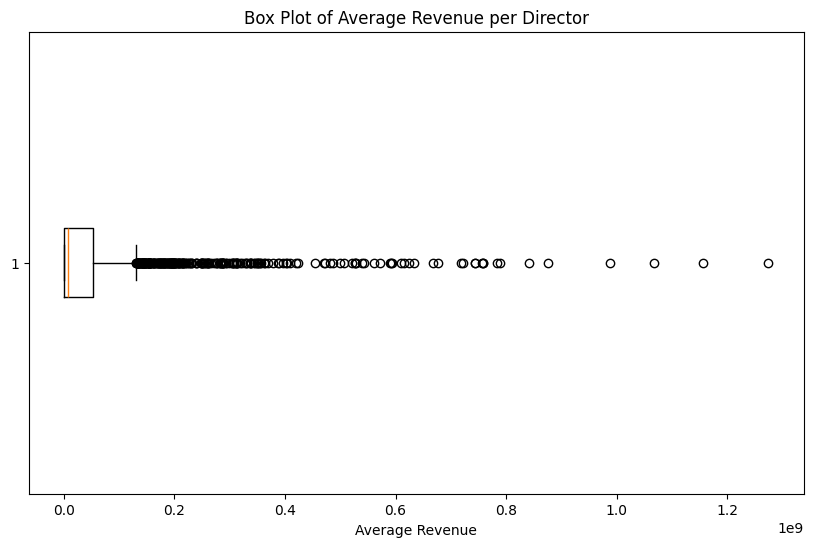

In [ ]:
# Calculate the average revenue per director
average_revenue_by_director = df.groupby('director')['revenue'].mean()
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(average_revenue_by_director.dropna(), vert=False)
plt.xlabel('Average Revenue')
plt.title('Box Plot of Average Revenue per Director')
plt.show()

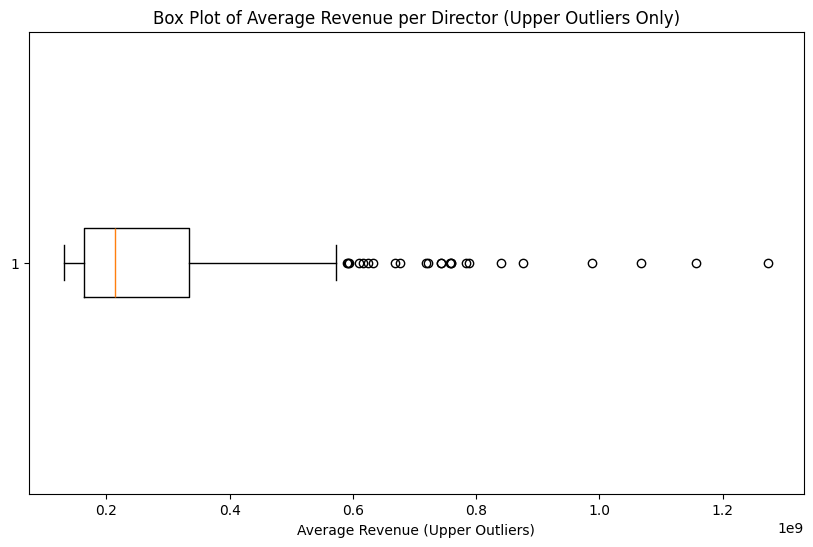

In [ ]:
# Calculate the average revenue per director
average_revenue_by_director = df.groupby('director')['revenue'].mean().dropna()

# Calculate the IQR to identify upper outliers
q1 = average_revenue_by_director.quantile(0.25)
q3 = average_revenue_by_director.quantile(0.75)
iqr = q3 - q1

# Define the upper bound for outliers
upper_bound = q3 + 1.5 * iqr

# Extract only the upper outliers
upper_outliers = average_revenue_by_director[average_revenue_by_director > upper_bound]

# Create a box plot for the upper outliers
plt.figure(figsize=(10, 6))
plt.boxplot(upper_outliers, vert=False)
plt.xlabel('Average Revenue (Upper Outliers)')
plt.title('Box Plot of Average Revenue per Director (Upper Outliers Only)')
plt.show()

### Ranking studios based on highest average revenue:

In [ ]:
import ast

# Function to extract production company names from the JSON-like string
def extract_company_names(entry):
    try:
        # Convert the string representation of the list to an actual list
        companies = ast.literal_eval(entry)
        return [company['name'] for company in companies]
    except (ValueError, SyntaxError):
        return []

# Apply the function to extract all company names into a new column
df['extracted_studios_extracted'] = df['production_companies'].dropna().apply(extract_company_names)

# Explode the list of companies so each company has its own row
df_exploded = df.explode('extracted_studios_extracted')

# Group by the individual production companies and calculate average revenue
average_revenue_by_company = df_exploded.groupby('extracted_studios_extracted')['revenue'].mean()

# Sort the results by average revenue in descending order and select the top 20
top_20_companies = average_revenue_by_company.sort_values(ascending=False).head(20)

# Print the top 20 production companies and their average revenues
print("Top 20 Production Companies with the Highest Average Revenues:")
print(top_20_companies)

Top 20 Production Companies with the Highest Average Revenues:
extracted_studios_extracted
Abu Dhabi Film Commission                     1,506,249,360
Colorado Office of Film, Television & Media   1,506,249,360
Québec Production Services Tax Credit         1,506,249,360
Prime Focus                                   1,405,403,694
Vita-Ray Dutch Productions (III)              1,153,304,495
Deluxe Digital Studios                        1,153,304,495
Lightstorm Entertainment                      1,124,376,357
Ian Bryce Productions                         1,091,405,097
Second Mate Productions                       1,013,329,906
Fairview Entertainment                          966,550,600
3Foot7                                          956,019,788
The Saul Zaentz Company                         898,827,882
Patalex IV Productions Limited                  895,921,036
China Movie Channel                             886,867,618
B24                                             880,674,609
Cruel & U

### Sorting by genre:

In [ ]:
# Combine all genre entries into a single string and split into individual words
all_words = ' '.join(df['genres'].dropna()).split()

# Get unique words using a set
unique_words = set(all_words)

# Print the unique words
for word in unique_words:
    print(word)

History
Adventure
Documentary
Music
Science
Romance
War
Fantasy
Drama
Mystery
Family
Comedy
TV
Foreign
Action
Fiction
Movie
Thriller
Horror
Crime
Animation
Western


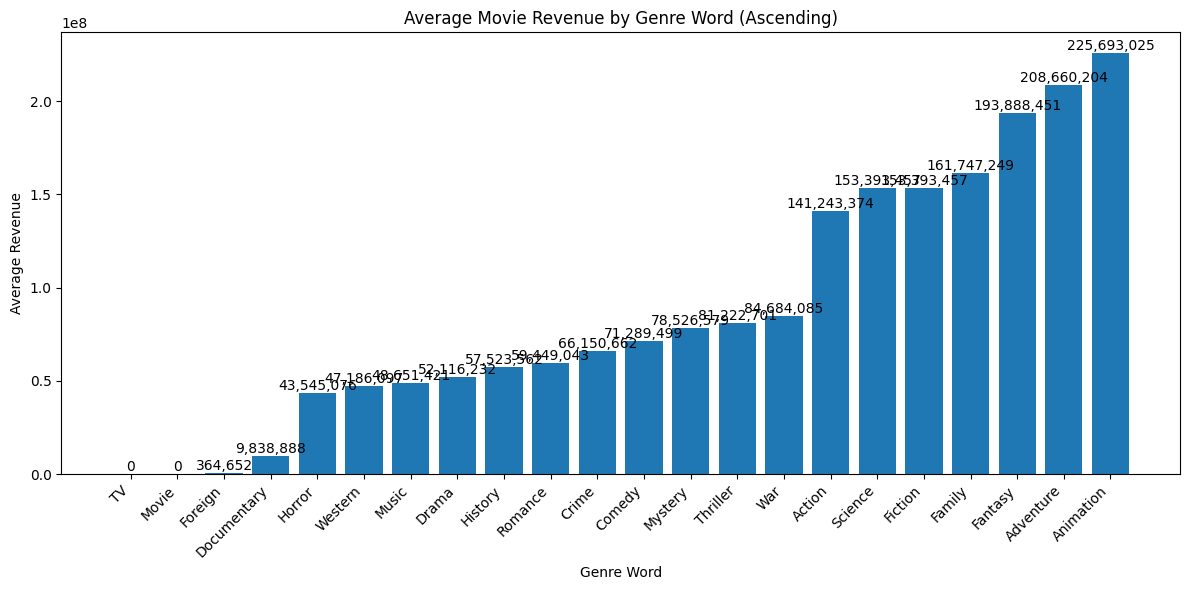

In [ ]:
# Combine all genre entries into a single string and split into individual words
all_words = ' '.join(df['genres'].dropna()).split()

# Get unique words using a set
unique_words = set(all_words)

# Calculate average revenue for movies containing each unique genre word
average_revenue_per_word = {}

for word in unique_words:
    # Filter movies that contain the word in their genre
    filtered_movies = df[df['genres'].str.contains(word, na=False)]

    # Calculate the average revenue for these movies
    average_revenue = filtered_movies['revenue'].mean()
    average_revenue_per_word[word] = average_revenue

# Sort the dictionary by average revenue in ascending order
sorted_revenue = dict(sorted(average_revenue_per_word.items(), key=lambda item: item[1]))

# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_revenue.keys(), sorted_revenue.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre Word')
plt.ylabel('Average Revenue')
plt.title('Average Movie Revenue by Genre Word (Ascending)')

# Label the bars with the average revenue values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

It seems that "science fiction" and "tv movie" should be grouped together as paired words. Let's reword the script to reflect this

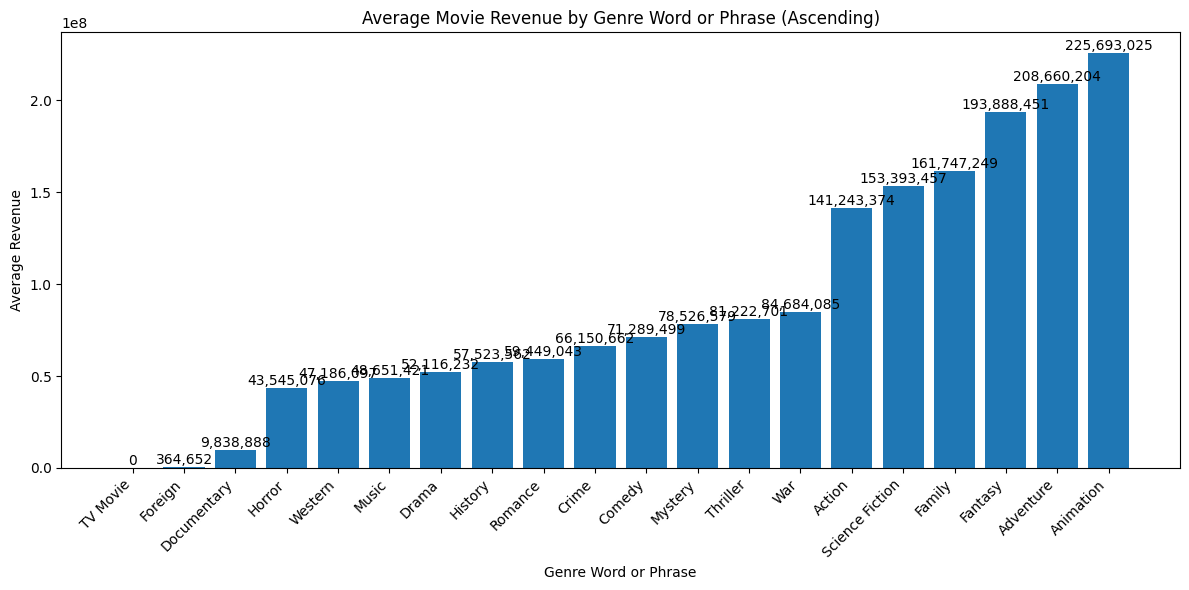

In [ ]:
import re

# Define the list of phrases to preserve
phrases_to_preserve = ['TV Movie', 'Science Fiction']

# Function to split the genres while preserving specific phrases
def split_genres(genre_string):
    for phrase in phrases_to_preserve:
        genre_string = genre_string.replace(phrase, phrase.replace(' ', '_'))
    return genre_string.split()

# Combine all genre entries into a single string and split into individual words or preserved phrases
all_words = ' '.join(df['genres'].dropna())
all_words_split = split_genres(all_words)

# Replace underscores back to spaces in preserved phrases
all_words_split = [word.replace('_', ' ') for word in all_words_split]

# Get unique words or phrases using a set
unique_words = set(all_words_split)

# Calculate average revenue for movies containing each unique genre word or phrase
average_revenue_per_word = {}

for word in unique_words:
    # Filter movies that contain the word or phrase in their genre
    filtered_movies = df[df['genres'].str.contains(re.escape(word), na=False)]

    # Calculate the average revenue for these movies
    average_revenue = filtered_movies['revenue'].mean()
    average_revenue_per_word[word] = average_revenue

# Sort the dictionary by average revenue in ascending order
sorted_revenue = dict(sorted(average_revenue_per_word.items(), key=lambda item: item[1]))

# Create a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_revenue.keys(), sorted_revenue.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Genre Word or Phrase')
plt.ylabel('Average Revenue')
plt.title('Average Movie Revenue by Genre Word or Phrase (Ascending)')

# Label the bars with the average revenue values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Revenue by season of release:

In [ ]:
# print release_season values
print(df['release_date'].unique())

# take the second value of the date (the month) and store as release_month
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

# drop nan values from this new month df
df.dropna(subset=['release_month'], inplace=True)

# print unique values of release_month
print(df['release_month'].unique())

['2009-12-10' '2007-05-19' '2015-10-26' ... '2011-12-26' '2013-10-13'
 '2012-05-03']
[12.  5. 10.  7.  3. 11.  4.  6.  2.  8.  9.  1.]


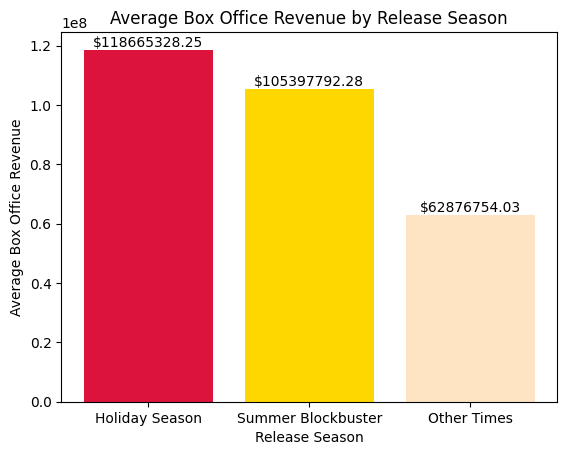

In [ ]:
# encode release_month variable to a release_season
def release_season(release_month):
    if release_month in [11, 12]:
        return 0  # Holiday season
    elif release_month in [6, 7, 8]:
        return 1  # Summer blockbuster season
    elif release_month in [1, 2, 3, 4, 5, 9, 10]:
        return 2  # Other times of the year
    else:
        raise ValueError("Month must be an integer from 1 to 12")

# apply above function to create a 'release_season' column in the df
df['season'] = df['release_month'].apply(release_season)

# group by season and calculate average revenue
avg_revenue_by_season = df.groupby('season')['revenue'].mean()

# plot results
seasons = ['Holiday Season', 'Summer Blockbuster', 'Other Times']
avg_revenue = [avg_revenue_by_season.get(season, 0) for season in range(3)]

plt.bar(seasons, avg_revenue_by_season, color=['crimson', 'gold', 'bisque'])
plt.xlabel('Release Season')
plt.ylabel('Average Box Office Revenue')
plt.title('Average Box Office Revenue by Release Season')

for i, v in enumerate(avg_revenue):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.show()

In [ ]:
df.to_csv('movie_dataset_2.csv')

## Post EDA df transformation:

In [ ]:
# Load the new CSV file
df = pd.read_csv('/content/DS3001-Project1/Data/movie_dataset_2.csv')
df.head()

,Unnamed: 0,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,...,tagline,title,vote_average,vote_count,cast,crew,director,extracted_studios_extracted,release_month,season
0,0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,Enter the World of Pandora.,Avatar,7,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,"['Ingenious Film Partners', 'Twentieth Century...",12,0
1,1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,7,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",5,2
2,2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,...,A Plan No One Escapes,Spectre,6,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,"['Columbia Pictures', 'Danjaq', 'B24']",10,2
3,3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,...,The Legend Ends,The Dark Knight Rises,8,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",7,1
4,4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",...,"Lost in our world, found in another.",John Carter,6,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,['Walt Disney Pictures'],3,2


In [ ]:
df.describe()

,Unnamed: 0,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_month,season
count,4802.000000,4802.000000,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4800.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,2400.551853,2400.551853,2.905109e+07,57098.234902,21.496776,8.227777e+07,106.898125,6.093440,690.361724,6.795918,1.431695
std,1386.447506,1386.447506,4.072447e+07,88581.302370,31.818451,1.628697e+08,22.561593,1.191496,1234.674268,3.424187,0.755745
min,0.000000,0.000000,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1200.250000,1200.250000,8.000000e+05,9013.750000,4.671734,0.000000e+00,94.000000,5.600000,54.000000,4.000000,1.000000
50%,2400.500000,2400.500000,1.500000e+07,14626.500000,12.924931,1.917498e+07,103.000000,6.200000,235.500000,7.000000,2.000000
75%,3600.750000,3600.750000,4.000000e+07,58589.750000,28.332017,9.291920e+07,118.000000,6.800000,737.000000,10.000000,2.000000
max,4802.000000,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,12.000000,2.000000


In [ ]:
df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_month', 'season', 'revenue']].corr()

,budget,popularity,runtime,vote_average,vote_count,release_month,season,revenue
budget,1.000000,0.505364,0.269792,0.092644,0.593148,0.050281,-0.144607,0.730806
popularity,0.505364,1.000000,0.225372,0.273990,0.778114,0.046648,-0.095730,0.644700
runtime,0.269792,0.225372,1.000000,0.371888,0.272036,0.157792,-0.150810,0.251188
vote_average,0.092644,0.273990,0.371888,1.000000,0.313263,0.108011,-0.076311,0.197153
vote_count,0.593148,0.778114,0.272036,0.313263,1.000000,0.042652,-0.086948,0.781475
release_month,0.050281,0.046648,0.157792,0.108011,0.042652,1.000000,-0.623703,0.055232
season,-0.144607,-0.095730,-0.150810,-0.076311,-0.086948,-0.623703,1.000000,-0.141883
revenue,0.730806,0.644700,0.251188,0.197153,0.781475,0.055232,-0.141883,1.000000


### Transform 'Budget' and 'Revenue' Variables

In [ ]:
df['budget_log'] = np.log(df['budget'])
df['revenue_log'] = np.log(df['revenue'])
df['budget_arc'] = np.arcsinh(df['budget'])
df['revenue_arc'] = np.arcsinh(df['revenue'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### Correlation Matrices

In [ ]:
df[['budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'release_month', 'season', 'revenue', 'budget_log', 'revenue_log']].corr()

,budget,popularity,runtime,vote_average,vote_count,release_month,season,revenue,budget_log,revenue_log
budget,1.000000,0.505364,0.269792,0.092644,0.593148,0.050281,-0.144607,0.730806,0.604590,0.518257
popularity,0.505364,1.000000,0.225372,0.273990,0.778114,0.046648,-0.095730,0.644700,0.289330,0.411682
runtime,0.269792,0.225372,1.000000,0.371888,0.272036,0.157792,-0.150810,0.251188,0.235972,0.188929
vote_average,0.092644,0.273990,0.371888,1.000000,0.313263,0.108011,-0.076311,0.197153,0.049122,0.136353
vote_count,0.593148,0.778114,0.272036,0.313263,1.000000,0.042652,-0.086948,0.781475,0.318420,0.468416
release_month,0.050281,0.046648,0.157792,0.108011,0.042652,1.000000,-0.623703,0.055232,0.017652,0.026238
season,-0.144607,-0.095730,-0.150810,-0.076311,-0.086948,-0.623703,1.000000,-0.141883,-0.091524,-0.133649
revenue,0.730806,0.644700,0.251188,0.197153,0.781475,0.055232,-0.141883,1.000000,0.389613,0.568815
budget_log,0.604590,0.289330,0.235972,0.049122,0.318420,0.017652,-0.091524,0.389613,1.000000,0.657084
revenue_log,0.518257,0.411682,0.188929,0.136353,0.468416,0.026238,-0.133649,0.568815,0.657084,1.000000


In [ ]:
df[['popularity', 'runtime', 'vote_average', 'vote_count', 'release_month', 'season', 'budget_arc', 'revenue_arc']].corr()

,popularity,runtime,vote_average,vote_count,release_month,season,budget_arc,revenue_arc
popularity,1.000000,0.225372,0.273990,0.778114,0.046648,-0.095730,0.327452,0.403494
runtime,0.225372,1.000000,0.371888,0.272036,0.157792,-0.150810,0.244723,0.264412
vote_average,0.273990,0.371888,1.000000,0.313263,0.108011,-0.076311,0.215156,0.289825
vote_count,0.778114,0.272036,0.313263,1.000000,0.042652,-0.086948,0.322571,0.405625
release_month,0.046648,0.157792,0.108011,0.042652,1.000000,-0.623703,0.079333,0.086026
season,-0.095730,-0.150810,-0.076311,-0.086948,-0.623703,1.000000,-0.116582,-0.127613
budget_arc,0.327452,0.244723,0.215156,0.322571,0.079333,-0.116582,1.000000,0.698094
revenue_arc,0.403494,0.264412,0.289825,0.405625,0.086026,-0.127613,0.698094,1.000000


In [ ]:
df.shape

(4802, 32)

### Check and Fill Missing Values

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
index,0
budget,0
genres,27
homepage,3090
id,0
keywords,411
original_language,0
original_title,0
overview,3


In [ ]:
df.fillna(df['runtime'].mean(), inplace=True)

In [ ]:
# Predictor variables
x= df[['budget', 'popularity', 'vote_count']]
# Target variable
y= df[['revenue']]

## Linear Model (Numeric Variables)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [ ]:
# Train/test/split 80-20
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 100)

# Run linear regression model
model= linear_model.LinearRegression(fit_intercept= False).fit(X_train, y_train)
y_hat= model.predict(X_test)

print('Test R2: ', model.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_hat)))
print('Train R2: ', model.score(X_train, y_train))

Test R2:  0.7205797346764626
RMSE:  85760000.38113119
Train R2:  0.723216721545048


**Interpretation:**
Model performs similarly between test and train data - indicating no major overfitting or underfitting. RMSE indicates that, on average, the predictions for revenue are off by about 85.76 million.



## Categorical Variables

In [ ]:
df['extracted_studios_extracted'].nunique()

3697

In [ ]:
print(df['director'].nunique())
df.loc[:10, 'director']

2350


,director
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Andrew Stanton
5,Sam Raimi
6,Byron Howard
7,Joss Whedon
8,David Yates
9,Zack Snyder


## Model 1

In [ ]:
# Handle Budget (already numerical)
df['budget'] = df['budget'].fillna(0)  # Handle missing budgets

# Categorize directors into quartiles and outliers
average_revenue_by_director = df.groupby('director')['revenue'].mean()
quartiles = np.percentile(average_revenue_by_director, [25, 50, 75])

In [ ]:
def categorize_director(director):
    revenue = average_revenue_by_director.get(director, 0)
    if revenue <= quartiles[1]:  # Median
        return 'Director_1' if revenue <= quartiles[0] else 'Director_2'
    else:
        outliers = average_revenue_by_director[average_revenue_by_director > quartiles[2]]
        if director in outliers[:len(outliers) // 2]:
            return 'Director_3'
        elif director in outliers[len(outliers) // 2:]:
            return 'Director_4'
    return None

df['director_category'] = df['director'].apply(categorize_director)

# One-hot encode director categories
directors_encoded = pd.get_dummies(df['director_category'], prefix='director')

In [ ]:
# One-hot encode genres
df['genres_split'] = df['genres'].str.split(' ')
genres_exploded = df.explode('genres_split')
genres_encoded = pd.get_dummies(genres_exploded['genres_split'], prefix='genre').groupby(genres_exploded.index).max()

In [ ]:
# Encode release seasons
def release_season(month):
    if month in [11, 12]:
        return 'Season_Winter'
    elif month in [6, 7, 8]:
        return 'Season_Summer'
    else:
        return 'Season_Other'

df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month
df['season'] = df['release_month'].apply(release_season)
seasons_encoded = pd.get_dummies(df['season'])

In [ ]:
# Combine all features
X = pd.concat([df[['budget']], directors_encoded, genres_encoded, seasons_encoded], axis=1)
y = df['revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on the training data
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate on the test data
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training RMSE: {train_rmse}")
print(f"Training R-Squared: {train_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R-Squared: {test_r2}")

Training RMSE: 108254400.01853192
Training R-Squared: 0.5452391611394175
Test RMSE: 108086028.66714215
Test R-Squared: 0.586420464424741


The model performs similarly between training and test data, with no major signs of overfitting or underfitting. The RMSE values suggest that, on average, the predictions for revenue are off by about 108.25 million for the training set and 108.08 million for the test set. The R2 values indicate that the model explains approximately 54.5% of the variance in revenue for the training data and 58.6% for the test data, showing a reasonable but not highly predictive model.

### Find Keywords Associated with 40 highest average box office revenues

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/workspace/DS3001-Project1/Data/movie_dataset_2.csv")

# Ensure keywords column has no NaN values
df = df.dropna(subset=['keywords'])

# Explode keywords into individual rows
df['keywords'] = df['keywords'].str.split()  # Split keywords by space
df_exploded = df.explode('keywords')  # Create a new row for each keyword

# Group by individual keywords and calculate average box office revenue
keyword_avg_revenue = df_exploded.groupby('keywords')['revenue'].mean()

# sorting the keywords by highest revenue -- then sorting into 3 lists
top10_keywords = keyword_avg_revenue.sort_values(ascending=False).head(10)
keywords_11_to_20 = keyword_avg_revenue.sort_values(ascending=False).iloc[11:20]
keywords_21_to_30 = keyword_avg_revenue.sort_values(ascending=False).iloc[21:30]
keywords_31_to_40 = keyword_avg_revenue.sort_values(ascending=False).iloc[31:40]

print("Top 10 Keywords Associated with the Highest Average Box Office Revenue:")
print(top10_keywords)


Top 10 Keywords Associated with the Highest Average Box Office Revenue:
keywords
iceberg         1.845034e+09
snowman         1.274219e+09
minions         1.156731e+09
barbie          1.066970e+09
middle-earth    9.787336e+08
(tolkien)       9.787336e+08
bakery          9.707619e+08
titanic         9.436999e+08
reef            9.403355e+08
triceratops     9.201000e+08
Name: revenue, dtype: float64


In [ ]:
print("Keywords Ranked 11–20 by Average Box Office Revenue:")
print(keywords_11_to_20)

Keywords Ranked 11–20 by Average Box Office Revenue:
keywords
broom           9.149401e+08
transformers    9.005574e+08
orcs            8.979636e+08
sorcerer's      8.959210e+08
footed          8.772448e+08
badger          8.772448e+08
artifact        8.362972e+08
strength        8.290000e+08
imprinting      8.290000e+08
Name: revenue, dtype: float64


In [ ]:
print("Keywords Ranked 21–30 by Average Box Office Revenue:")
print(keywords_21_to_30)

Keywords Ranked 21–30 by Average Box Office Revenue:
keywords
boar        7.882418e+08
shaman      7.882418e+08
colony      7.837854e+08
shield      7.765654e+08
hermit      7.753980e+08
melting     7.690928e+08
sleeping    7.585398e+08
ogre        7.526009e+08
universe    7.450000e+08
Name: revenue, dtype: float64


In [ ]:
print("Keywords Ranked 31–40 by Average Box Office Revenue:")
print(keywords_31_to_40)

Keywords Ranked 31–40 by Average Box Office Revenue:
keywords
dormitory        7.435596e+08
floating         7.350991e+08
electrocution    7.057174e+08
velociraptor     7.037947e+08
booby            6.769647e+08
fleet            6.656923e+08
wonderland       6.624306e+08
alice            6.624306e+08
mammoth          6.609408e+08
Name: revenue, dtype: float64


#### A lot of these words are hyperspecific (aka: "transformers", "titanic", etc.). These words would not be useful in prediction because they are not very common. 3 ones that we can use:

1. Universe (30th)
2. Strength (19th)
3. Floating (32nd)

# Integrate keywords into categorical model 1

In [10]:
from sklearn.linear_model import LassoCV

# Process keywords
selected_keywords = ['universe', 'strength', 'floating', 'artifact', 'reef', 'shield', 'fleet']

def keyword_presence(keywords, keyword):
    return 1 if keyword in keywords.split() else 0

for keyword in selected_keywords:
    df[f'keyword_{keyword}'] = df['keywords'].fillna('').apply(lambda x: keyword_presence(x, keyword))

keywords_encoded = df[[f'keyword_{kw}' for kw in selected_keywords]]

# Combine all features
X = pd.concat([df[['budget']], directors_encoded, genres_encoded, seasons_encoded, keywords_encoded], axis=1)
y = df['revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LASSO model
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Evaluate on the training data
y_train_pred = lasso.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate on the test data
y_test_pred = lasso.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training RMSE: {train_rmse}")
print(f"Training R-Squared: {train_r2}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R-Squared: {test_r2}")

# Print important features
print("Important Features (Non-zero Coefficients):")
important_features = pd.Series(lasso.coef_, index=X.columns).loc[lambda x: x != 0]
print(important_features)

Training RMSE: 114304059.20421489
Training R-Squared: 0.5095895474584395
Test RMSE: 97604429.18545504
Test R-Squared: 0.6336229041536948
Important Features (Non-zero Coefficients):
budget    2.921772
dtype: float64


The model with keywords shows a slight trade-off in performance. After adding keywords:

- The Training RMSE increased from 108,254,400 to 114304059 and Training R² decreased from 0.545 to 0.510, indicating the model fit the training data slightly worse.
- However, the Test RMSE improved significantly, dropping from 108,086,029 to 97,604,429, and Test R² increased from 0.586 to 0.634, showing better generalization to unseen data.



## Conclusion:

Overall, we found that the addition of keywords (with the method used) had an ambiguous effect on overall model performance. We found that keywords associated with high average box office revenues were also generally associated with unique, high grossing movies (aka: “iceberg”, “titanic”, “transformers”, etc). Thus, such words have little effect on predicting general box office outcomes.

Overall, variables such as production studio, director, and genre seemed to have a relatively more significant effect on revenue prediction. 
